# Exercise "Lecture 8: Regression"

In this set of exercises, we will use regression to predict a baseball player's batting average based on previous results. 

The exercises cover the following points:
* Storing the data into an pandas dataframe (Exercise 1)
* Inspecting the data (Exercise 2-7)
* Creating Train and Test data (Exercise 8)
* Learning a Linear Regression model from the data (Exercise 9-11)
* Inspecting the predictions of that model (Exercise 12-17)
* Multiple Linear Regression: Adding features and observing the changes in predictions (PROVIDED)

_**Useful Cheat sheets**_
* pandas_cheat_sheet.ipynb
* linear_regression_cheat_sheet.ipynb
* stats_and_visu.ipynb

### Storing the data into a dataframe

**Exercise 1:** Create a pandas dataframe containing the  data

* Download the data file "baseball.csv" from Arche and store it in a data directory placed where your current Jupyter notebook is
* Use the pandas.read_csv  method to create the dataframe. 
* How many rows and columns ? Use  the pandas [df.shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) attribute to inspect the dataframe you just created

**Help:** pandas_cheat_sheet.ipynb

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
df = pd.read_csv('baseball.csv', sep='\t')
print(df.shape)
df.info()

(588, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   588 non-null    int64  
 1   NAMElast               588 non-null    object 
 2   NAMEfirst              588 non-null    object 
 3   BattingAverage         588 non-null    float64
 4   BattingAverageLAG1     588 non-null    float64
 5   CumulativeAverageLAG1  588 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 27.7+ KB


### Inspecting the data 

**Exercise 2:** Print out the headers

In [10]:
df.head()

,YEAR,NAMElast,NAMEfirst,BattingAverage,BattingAverageLAG1,CumulativeAverageLAG1
0,1960,Aaron,Hank,0.292,0.355,0.355
1,1961,Aaron,Hank,0.327,0.292,0.324
2,1962,Aaron,Hank,0.323,0.327,0.325
3,1963,Aaron,Hank,0.319,0.323,0.324
4,1964,Aaron,Hank,0.328,0.319,0.323


**Exercise 3:** Print out the first 5 rows

In [11]:
df.head(5)

,YEAR,NAMElast,NAMEfirst,BattingAverage,BattingAverageLAG1,CumulativeAverageLAG1
0,1960,Aaron,Hank,0.292,0.355,0.355
1,1961,Aaron,Hank,0.327,0.292,0.324
2,1962,Aaron,Hank,0.323,0.327,0.325
3,1963,Aaron,Hank,0.319,0.323,0.324
4,1964,Aaron,Hank,0.328,0.319,0.323


**Exercise 4:** Use pandas describe() method to get basic summary statistics for each of the columns.

In [12]:
df.describe()

,YEAR,BattingAverage,BattingAverageLAG1,CumulativeAverageLAG1
count,588.000000,588.000000,588.000000,588.000000
mean,1982.372449,0.277202,0.279194,0.275794
std,13.813520,0.031114,0.029996,0.024000
min,1960.000000,0.185000,0.185000,0.198000
25%,1970.000000,0.256000,0.259000,0.259000
50%,1983.000000,0.277000,0.280000,0.274000
75%,1996.000000,0.298000,0.300000,0.291000
max,2004.000000,0.390000,0.368000,0.357000


**Exercise 5:** Using scatter plots to explore correlation

Create two scatter plots:

* One scatter plot showing the relation between BattingAverage and BattingAverageLAG1
* One scatter plot showing the relation between BattingAverage and CumulativeAverageLAG1

What kind of relationship do you see? e.g. positive, negative? linear? non-linear?   
_**Hint:**_ 
Use matplotlib scatter, xlabel, ylabel ant title methods to create the plots (cf. stats_and_visu_cheat_sheet.ipynb)

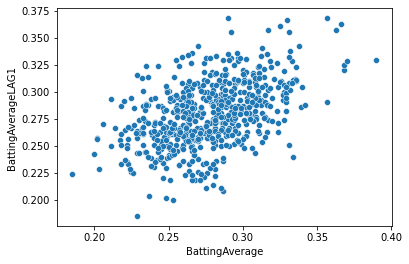

In [20]:
sns.scatterplot(x = 'BattingAverage', y = 'BattingAverageLAG1', data = df);

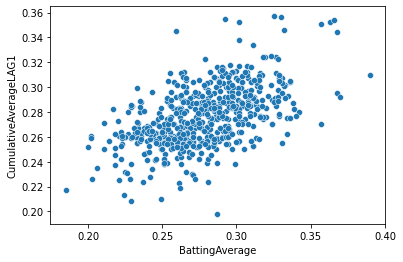

In [19]:
sns.scatterplot(x = 'BattingAverage', y = 'CumulativeAverageLAG1', data = df);

**Exercise 6:** Examining Correlations between features

* Use pandas [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr) method to compute correlation between features (use pearson's r metrics)   
Which feature is most strongly correlated with Batting Avg Scores ?

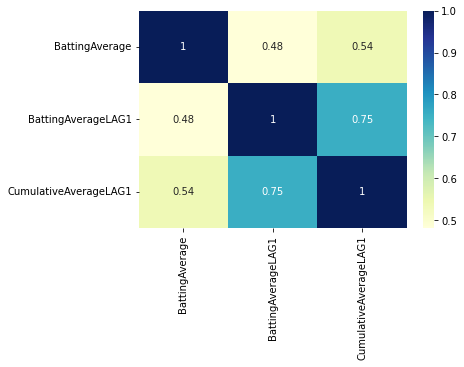

In [26]:
sns.heatmap(df[['BattingAverage', 'BattingAverageLAG1', 'CumulativeAverageLAG1']].corr(), 
            annot = True,cmap="YlGnBu");

**Exercise 7**

* Use matplolib hist method to display the histogram of Batting average scores   
Is the distribution normal or skewed ?

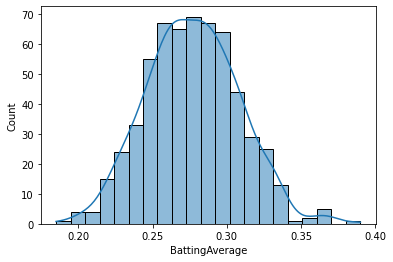

In [29]:
sns.histplot(x = 'BattingAverage', data = df, kde = True);

### Creating Training and Test Data

$Y$ = batting average score  (the dependent variable)   
$X$ = all the other features (the independent variable)

We use $X$ and $Y$ to learn a linear regression model and predict batting average scores. 

**Exercise 8:** Creating train and test data

* Create two new dataframes, one called X from the BattingAverageLAG1 column and the other called Y from the BattingAverage column.
* Reshape X to a list of lists using e.g., X.values.reshape(-1, 1).  
When using a single feature for regression, you need to reshape your array as shown, else it will be rejected by 
the linear regression model. 

_**Cf. regression CS for an example.**_

In [47]:
X = df.BattingAverageLAG1
X = X.values.reshape(-1,1)
Y = df.BattingAverage

* Split the data into training and testing subsets.   
Remember that the data must first be shuffled into a random order to remove any bias in the ordering of the dataset. An easy way to ensure this shuffling is to use the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from sklearn.model_selection

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,
                                                    shuffle =True)

### Training and Testing a Linear Regression Model

_**Cf. regression_cheat_sheet.ipynb**_ 

**Exercise 9:**  Create a LinearRegression object
Use sklearn [LinearRegression()](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html) method 

In [50]:
linear_model = LinearRegression()

**Exercise 10:** Fit the model

* The fit() function estimates the coefficients the linear regression using least squares.
* It learns a model

In [53]:
model = linear_model.fit(X_train, y_train)

**Exercise 11:** Compute the predictions

* on the training data
* on the test data

In [54]:
y_mpred = model.predict(X_train)
y_pred = model.predict(X_test)

### Inspecting the model predictions

How well does the model fit the test data ? (PROVIDED: adapt it to the variable names you used)  

* Create a scatter plot representing the test data: X are the input features and Y are the observed values. 
* Overlay it with a plot representing the model predictions:  X are the input features and Y are the values predicted for X by the model.     
The closer the datapoints are to the blue line, the most accurate the model predictions are. 

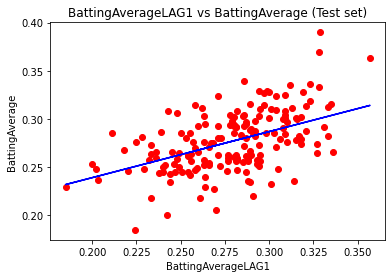

In [58]:
# Visualising the Test set results 

plt.scatter(X_test, y_test, color = 'red') 
plt.plot(X_test, y_pred, color = 'blue') 
plt.title('BattingAverageLAG1 vs BattingAverage (Test set)') 
plt.xlabel('BattingAverageLAG1') 
plt.ylabel('BattingAverage') 
plt.show()

**Exercise 12:** Compute the mean squared error for both predictions.   
Use the mean_squared_error method from sklearn.metrics 

In [60]:
mean_squared_error(y_true=y_test, y_pred = y_pred)

0.0007202327633345976

**Exercise 13:** Print out the model score ($R^2$)

* lm.score is the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)
* It is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
* a statistical measure of how well the regression predictions approximate the real data points
* An $R^2$ of 1 indicates that the regression predictions perfectly fit the data.

In [62]:
model.score(X_train, y_train)

0.208619438745262

**Exercise 14:** Inspect the feature weights

* lm.coef_ = array of estimated coefficients
* Use pandas DatFrame.from_items to create a dataframe whose columns are the features (X.columns) and the model coefficients (lm.coef_ )

In [65]:
coef = pd.DataFrame.from_dict(model.coef_)
coef

,0
0,0.477315


**Exercise 15:** Compare predicted and expected scores

In [107]:
y_pred = pd.Series(y_pred)
scores = pd.concat([y_test, y_pred],axis=1)

,BattingAverage,0
122,0.286,0.251149
361,0.280,NaN
88,0.306,0.268332
278,0.294,NaN
193,0.256,NaN
...,...,...
171,NaN,0.277401
172,NaN,0.276447
173,NaN,0.272628
175,NaN,0.282175


**Exercise 16:** Display the histogram of predicted scores

* Use plt.hist method

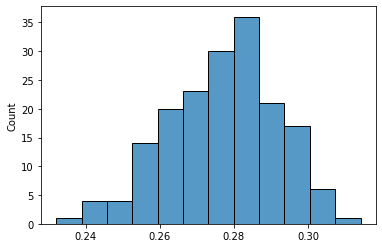

In [86]:
sns.histplot(y_pred);

**Exercise 17:** Plot the histograms of the true scores compared to the predicted scores (side by side)

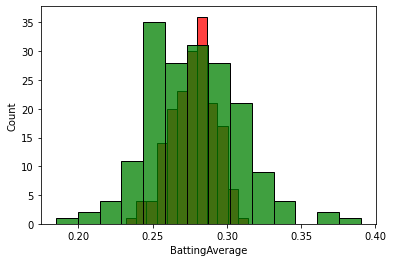

In [110]:
sns.histplot(y_pred, color='red');
sns.histplot(y_test, color='green');

### Multiple Linear Regression (PROVIDED)
#### Using both features


In [92]:
# Get the features values (X) and the target values (Y)
X = df[["BattingAverageLAG1","CumulativeAverageLAG1"]]
Y = df["BattingAverage"]

#### Training a new model 

Retrain to take into account the new features

In [93]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, Y_train, Y_test  = train_test_split(X,Y, 
                                                     test_size=0.20, random_state=42)

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

LinearRegression(normalize=True)

#### Inspecting the results

Inspect the feature weight

In [94]:
L = {'Features':X_train.columns,'Coefficients':lm.coef_}
pd.DataFrame(L)

,Features,Coefficients
0,BattingAverageLAG1,0.18645
1,CumulativeAverageLAG1,0.53018


Compute the mean squared error

In [95]:
print("MSE on Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print("MSE on X_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

MSE on Y_train: 0.0006657839858356908
MSE on X_test: 0.0007075255723492992


Compute the score (coefficient of determination)

In [96]:
print(lm.score(X_train,Y_train))
print(lm.score(X_test,Y_test))

0.3078048067697162
0.27508415253602847
